In [195]:
import pandas as pd
import numpy as np
import copy, time
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier



In [251]:
data_path = 'midterm/'
df_train = pd.read_csv(data_path + 'train_data.csv')
df_test = pd.read_csv(data_path + 'test_features.csv')


In [252]:
print(f'train人數:{len(df_train)}')
print(f'test人數:{len(df_test)}')

train人數:113
test人數:33


In [253]:
#poi 有多少人?
df_train.poi.sum()

13

In [254]:
#把train_dat和test_fetures結合在一起做特徵工程後，再行切割
df = pd.concat([df_train,df_test],axis=0,ignore_index=True)

In [255]:
df.columns

Index(['bonus', 'deferral_payments', 'deferred_income', 'director_fees',
       'email_address', 'exercised_stock_options', 'expenses', 'from_messages',
       'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances',
       'long_term_incentive', 'name', 'other', 'poi', 'restricted_stock',
       'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi',
       'to_messages', 'total_payments', 'total_stock_value'],
      dtype='object')

1. bonus:紅利 Reflects annual cash incentives paid based upon company performance. Also may include other retention payments.紅利：反映根據公司績效而支付的年度現金獎勵。還可能包括其他保留金。
2. deferral_payments: 延期付款。先交貨或付款Reflects distributions from a deferred compensation arrangement due to termination of employment or due to in-service withdrawals as per plan provisions. 延期付款。反映根據計劃規定，由於終止僱傭關係或由於在職取款而產生的遞延補償安排的分配。
3. deferred_income: 延遞收入，類似政府補助你一筆錢。屬於負債，Reflects voluntary executive deferrals of salary, annual cash incentives, and long-term cash incentives as well as cash fees deferred by non-employee directors under a deferred compensation arrangement. May also reflect deferrals under a stock option or phantom stock unit in lieu of cash arrangement.  deferred_income：反映工資，年度現金獎勵和長期現金獎勵以及非僱員董事根據遞延薪酬安排遞延的自願執行行政遞延工資，年度現金獎勵和長期現金獎勵。也可能反映股票期權或虛擬股票單位下的延期，以代替現金安排。
4. director_fees: Reflects cash payments and/or value of stock grants made in lieu of cash payments to non-employee directors.  現金付款和/或代替非僱員董事的現金付款的股票贈款價值。
5. email_address: 
6. exercised_stock_options: Reflects amounts from exercised stock options which equal the market value in excess of the exercise price on the date the options were exercised either through cashless (same-day sale), stock swap or cash exercises. The reflected gain may differ from that realized by the insider due to fluctuations in the market price and the timing of any subsequent sale of the securities. 反映了從通過無現金（當日出售），股票掉期或現金行使而行使購股權之日起，行權股票期權的市場價值超過行使價的市場價值。由於市場價格的波動以及任何後續證券出售的時間，所反映的收益可能與內部人士所實現的收益有所不同。
7. expenses: Reflects reimbursements of business expenses. May include fees paid for consulting services. 費用：反映了業務費用的報銷。可能包括為諮詢服務支付的費用。
8. from_messages: 
9. from_poi_to_this_person: 
10. from_this_person_to_poi: 
11. loan_advances：Reflects total amount of loan advances, excluding repayments, provided by the Debtor in return for a promise of repayment. In certain instances, the terms of the promissory notes allow for the option to repay with stock of the company.反映債務人為償還諾言而提供的預付款總額，不包括還款額。在某些情況下，期票的條款允許選擇用公司股票還款。
12. long_term_incentive: Reflects long-term incentive cash payments from various long-term incentive programs designed to tie executive compensation to long-term success as measured against key performance drivers and business objectives over a multi-year period, generally 3 to 5 years. 反映了從各種長期激勵計劃中獲得的長期激勵現金付款，這些計劃旨在將高管薪酬與長期成功掛鉤，並根據關鍵績效驅動因素和業務目標在多年（通常為3至5年）中進行衡量。
13. other: Reflects items such as payments for severance, consulting services, relocation costs, tax advances and allowances for employees on international assignment (i.e. housing allowances, cost of living allowances, payments under Enron’s Tax Equalization Program, etc.). May also include payments provided with respect to employment agreements, as well as imputed income amounts for such things as use of corporate aircraft.  反映諸如遣散費，諮詢服務，搬遷費用，預支稅款和針對國際任務的僱員津貼（例如，住房津貼，生活津貼，根據安然稅收均等計劃支付的款項等）等項目。也可能包括與僱傭協議有關的付款，以及使用公務機之類的估算收入金額。
14. poi: 
15. restricted_stock: Reflects the gross fair market value of shares and accrued dividends (and/or phantom units and dividend equivalents) on the date of release due to lapse ofvesting periods, regardless of whether deferred. 反映由於投資到期而在發行之日的股份和應計股息（和/或幻影單位和股息等價物）的公允市場價值總額，無論是否遞延。
16. restricted_stock_deferred: Reflects value of restricted stock voluntarily deferred prior to release under a deferred compensation arrangement.  反映根據遞延補償安排在放行前自願遞延的受限股票的價值。
17. salary: Reflects items such as base salary, executive cash allowances, and benefits payments 反映諸如基本薪水，執行人員現金津貼和福利支付等項目
18. shared_receipt_with_poi: 
19. to_messages: 
20. total_payments: 
21. total_stock_value


In [256]:
#檢查NaN數量
for c in df.columns:
    print(c,df[c].isnull().sum())

bonus 64
deferral_payments 107
deferred_income 97
director_fees 129
email_address 35
exercised_stock_options 44
expenses 51
from_messages 60
from_poi_to_this_person 60
from_this_person_to_poi 60
loan_advances 142
long_term_incentive 80
name 0
other 53
poi 33
restricted_stock 36
restricted_stock_deferred 128
salary 51
shared_receipt_with_poi 60
to_messages 60
total_payments 21
total_stock_value 20


In [257]:
# 檢查 DataFrame 空缺值的狀態
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data)
na_check(df)

,Missing Ratio
loan_advances,97.260274
director_fees,88.356164
restricted_stock_deferred,87.671233
deferral_payments,73.287671
deferred_income,66.438356
long_term_incentive,54.794521
bonus,43.835616
from_this_person_to_poi,41.095890
from_poi_to_this_person,41.095890
from_messages,41.095890


In [262]:
#欄位特徵描述
df.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,8.200000e+01,3.900000e+01,4.900000e+01,1.700000e+01,1.020000e+02,9.500000e+01,86.000000,86.000000,86.000000,4.000000e+00,6.600000e+01,9.300000e+01,1.100000e+02,1.800000e+01,9.500000e+01,86.000000,86.000000,1.250000e+02,1.260000e+02
mean,2.374235e+06,1.642674e+06,-1.140475e+06,1.668049e+05,5.987054e+06,1.087289e+05,608.790698,64.895349,41.232558,4.196250e+07,1.470361e+06,9.190650e+05,2.321741e+06,1.664106e+05,5.621943e+05,1176.465116,2073.860465,5.081526e+06,6.773957e+06
std,1.071333e+07,5.161930e+06,4.025406e+06,3.198914e+05,3.106201e+07,5.335348e+05,1841.033949,86.979244,100.073111,4.708321e+07,5.942759e+06,4.589253e+06,1.251828e+07,4.201494e+06,2.716369e+06,1178.317641,2582.700981,2.906172e+07,3.895777e+07
min,7.000000e+04,-1.025000e+05,-2.799289e+07,3.285000e+03,3.285000e+03,1.480000e+02,12.000000,0.000000,0.000000,4.000000e+05,6.922300e+04,2.000000e+00,-2.604490e+06,-7.576788e+06,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.312500e+05,8.157300e+04,-6.948620e+05,9.878400e+04,5.278862e+05,2.261400e+04,22.750000,10.000000,1.000000,1.600000e+06,2.812500e+05,1.215000e+03,2.540180e+05,-3.896218e+05,2.118160e+05,249.750000,541.250000,3.944750e+05,4.945102e+05
50%,7.693750e+05,2.274490e+05,-1.597920e+05,1.085790e+05,1.310814e+06,4.695000e+04,41.000000,35.000000,8.000000,4.176250e+07,4.420350e+05,5.238200e+04,4.517400e+05,-1.469750e+05,2.599960e+05,740.500000,1211.000000,1.101393e+06,1.102872e+06
75%,1.200000e+06,1.002672e+06,-3.834600e+04,1.137840e+05,2.547724e+06,7.995250e+04,145.500000,72.250000,24.750000,8.212500e+07,9.386720e+05,3.620960e+05,1.002370e+06,-7.500975e+04,3.121170e+05,1888.250000,2634.750000,2.093263e+06,2.949847e+06
max,9.734362e+07,3.208340e+07,-8.330000e+02,1.398517e+06,3.117640e+08,5.235198e+06,14368.000000,528.000000,609.000000,8.392500e+07,4.852193e+07,4.266759e+07,1.303223e+08,1.545629e+07,2.670423e+07,5521.000000,15149.000000,3.098866e+08,4.345095e+08


In [263]:
df.dtypes

bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                float64
email_address                 object
exercised_stock_options      float64
expenses                     float64
from_messages                float64
from_poi_to_this_person      float64
from_this_person_to_poi      float64
loan_advances                float64
long_term_incentive          float64
name                          object
other                        float64
poi                           object
restricted_stock             float64
restricted_stock_deferred    float64
salary                       float64
shared_receipt_with_poi      float64
to_messages                  float64
total_payments               float64
total_stock_value            float64
dtype: object

In [264]:
#檢查 deferral_payments 延遞付款。先送貨後付款
#df[~df['deferral_payments'].isnull()]['deferral_payments']

#檢查 deferred_income 延遞收入
#df[~df['deferred_income'].isnull()]['deferred_income']

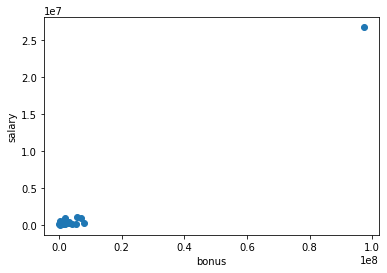

In [265]:
#檢查bonus vs salary   發現異常值
plt.scatter(df['bonus'],df['salary'])
plt.xlabel('bonus')
plt.ylabel('salary')
plt.show()

In [266]:
#發現人名叫TOTAL的薪水特高
df[df['salary'] > 1.5e7]['name']


133    TOTAL
Name: name, dtype: object

In [267]:
#在df_test資料中，出現TOTAL此欄位
(df_test['name'] == 'TOTAL').sum()

1

In [268]:
#刪除異常值 TOTAL
#df = df[df.name !='TOTAL']

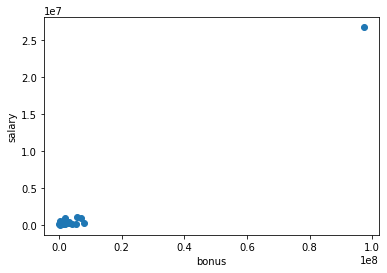

In [269]:
#再檢查bonus vs salary
plt.scatter(df['bonus'],df['salary'])
plt.xlabel('bonus')
plt.ylabel('salary')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f390339ec50>]],
      dtype=object)

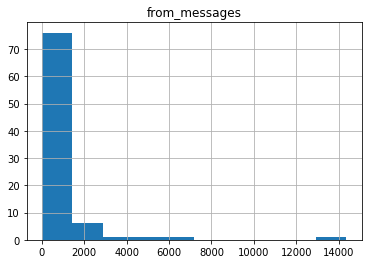

In [270]:
#檢查 from messages 發現有很高的數值
df.hist('from_messages' ,bins =10)

In [271]:
#那個特別高的是誰？
df[df.from_messages>12000]['name']

29    KAMINSKI WINCENTY J
Name: name, dtype: object

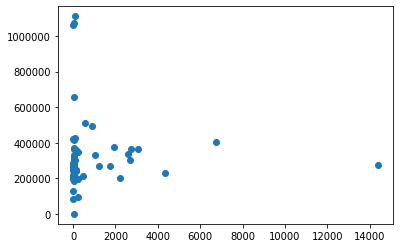

In [272]:
#畫一下 from_messages的分佈
plt.scatter(df['from_messages'],df['salary'])
plt.show()

In [273]:
df[df.from_messages < 100]['from_messages']

0      18.0
2      39.0
7      40.0
8      36.0
9      16.0
10     61.0
11     82.0
15     14.0
19     63.0
20     41.0
23     13.0
24     12.0
27     26.0
28     14.0
31     59.0
32     12.0
34     74.0
36     63.0
43     13.0
49     16.0
51     44.0
53     19.0
54     38.0
60     36.0
64     19.0
66     30.0
77     17.0
80     52.0
81     29.0
82     34.0
83     49.0
86     19.0
89     16.0
91     18.0
93     12.0
95     29.0
96     33.0
102    45.0
103    28.0
106    56.0
109    41.0
110    67.0
111    19.0
114    27.0
115    32.0
117    49.0
118    27.0
119    21.0
121    22.0
124    26.0
125    25.0
128    16.0
134    75.0
135    29.0
138    15.0
139    29.0
141    40.0
142    92.0
143    12.0
145    48.0
Name: from_messages, dtype: float64

In [274]:
    
# 部分欄位缺值填補 0
zero_cols = ['other','to_messages','shared_receipt_with_poi','from_messages','from_poi_to_this_person','from_this_person_to_poi']
for col in zero_cols:
    df[col] = df[col].fillna(0)

# 部分欄位缺值補中位數    
median_cols = ['total_stock_value','total_payments','restricted_stock','exercised_stock_options','salary','expenses','bonus']
for col in median_cols:
    df[col] = df[col].fillna(df[col].median())


# 部分欄位缺值補眾數
#mode_cols = []
#for col in mode_cols:
#    df[col] = df[col].fillna(df[col].mode()[0])

# 部分欄位缺值補 'None'
#none_cols = []
#for col in none_cols:
#    df[col] = df[col].fillna("None")

    

In [275]:
# 遺失值太多, 所以直接捨棄
df = df.drop(['loan_advances'], axis=1)
df = df.drop(['director_fees'], axis=1)
df = df.drop(['restricted_stock_deferred'], axis=1)
df = df.drop(['deferral_payments'], axis=1)
df = df.drop(['deferred_income'], axis=1)
df = df.drop(['long_term_incentive'], axis=1)

# email是不需要的資訊
df = df.drop(['email_address'], axis=1)


In [276]:
df['poi'].astype(float)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
116    NaN
117    NaN
118    NaN
119    NaN
120    NaN
121    NaN
122    NaN
123    NaN
124    NaN
125    NaN
126    NaN
127    NaN
128    NaN
129    NaN
130    NaN
131    NaN
132    NaN
133    NaN
134    NaN
135    NaN
136    NaN
137    NaN
138    NaN
139    NaN
140    NaN
141    NaN
142    NaN
143    NaN
144    NaN
145    NaN
Name: poi, Length: 146, dtype: float64

In [277]:
# 做完各種補缺值, 確認一下有沒有遺漏
na_check(df)

,Missing Ratio
poi,22.60274


In [278]:
df.dtypes

bonus                      float64
exercised_stock_options    float64
expenses                   float64
from_messages              float64
from_poi_to_this_person    float64
from_this_person_to_poi    float64
name                        object
other                      float64
poi                         object
restricted_stock           float64
salary                     float64
shared_receipt_with_poi    float64
to_messages                float64
total_payments             float64
total_stock_value          float64
dtype: object

In [279]:
#取 float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

13 Numeric Features : ['bonus', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'other', 'restricted_stock', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']



In [280]:
#進行特徵最大最小化
name = df['name']
poi = df['poi']
df = df.drop(['name','poi'], axis=1)


In [281]:
df_temp = MinMaxScaler().fit_transform(df)

In [249]:
#把df切回原本的 train_X 和 train_Y
train_num = df_train.shape[0]
train_X = df_temp[:train_num]
test_X = df_temp[train_num:]
train_Y = poi[:train_num]
test_X_names = name[train_num:]

In [283]:
len(test_X)

33

In [284]:
#sklearn預設的y需為整數
train_Y = np.array(train_Y, dtype=int)


In [285]:
# 建立模型
clf = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, 
                            max_features='sqrt', max_depth=6, bootstrap=True)

clf.fit(train_X, train_Y)
clf_pred = clf.predict_proba(test_X)[:,1]

sub = pd.DataFrame({'name': test_X_names, 'poi': clf_pred})
sub.to_csv('midtermResult.csv', index=False)

array([2.50000000e-01, 3.20000000e-01, 4.12523318e-01, 5.39784946e-02,
       4.58735439e-01, 2.77500000e-01, 6.29333333e-01, 2.77777778e-04,
       1.59027778e-01, 9.45974548e-02, 1.23821632e-01, 1.02777778e-02,
       6.33494097e-02, 2.77777778e-04, 4.21488971e-01, 1.00000000e-02,
       1.53089040e-02, 2.31000000e-01, 8.00000000e-02, 2.77777778e-04,
       4.02790995e-01, 5.35000000e-02, 2.10448232e-02, 0.00000000e+00,
       1.15277778e-02, 7.52777778e-02, 2.77777778e-04, 2.63078873e-01,
       4.26478495e-01, 1.97557065e-03, 5.51182881e-02, 4.30333333e-01])

bonus


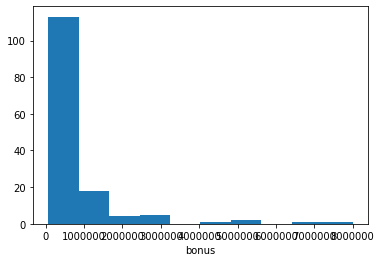

exercised_stock_options


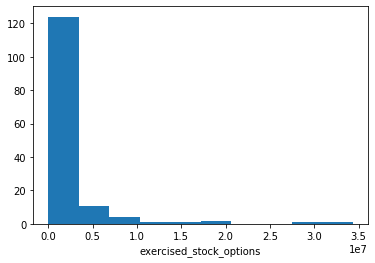

expenses


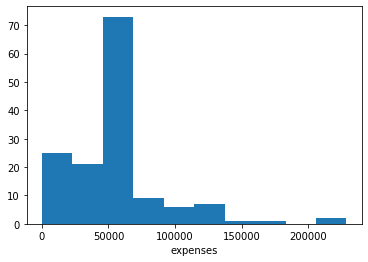

from_messages


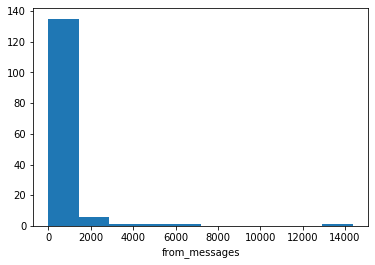

from_poi_to_this_person


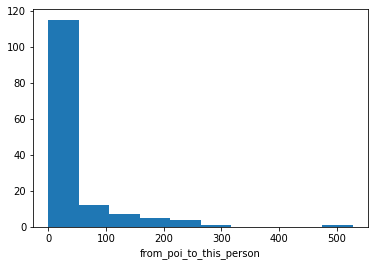

from_this_person_to_poi


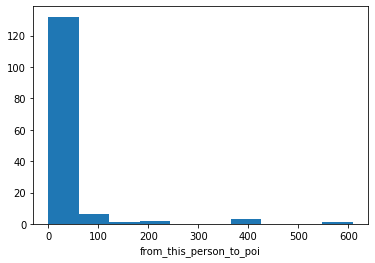

name


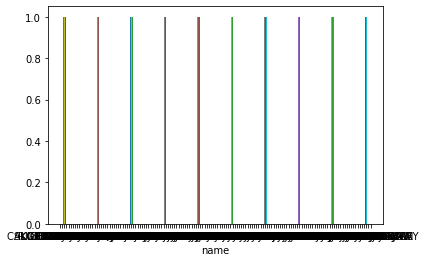

other


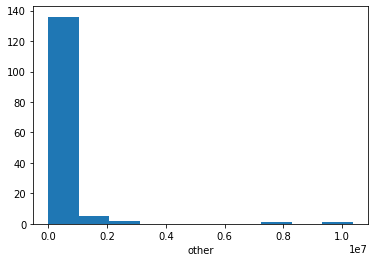

poi


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

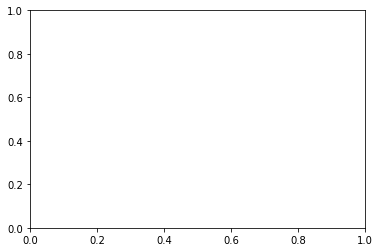

In [74]:
#檢查各欄位的直方圖

for c in df.columns:
    print(c)
    if c != 'email_address':
        plt.hist(df[c],bins= 10)
        plt.xlabel(c)
        plt.show()

In [23]:
bonus 64
deferral_payments 107
deferred_income 97
director_fees 129
email_address 35
exercised_stock_options 44
expenses 51
from_messages 60
from_poi_to_this_person 60
from_this_person_to_poi 60
loan_advances 142
long_term_incentive 80
name 0
other 53
poi 33
restricted_stock 36
restricted_stock_deferred 128
salary 51
shared_receipt_with_poi 60
to_messages 60
total_payments 21
total_stock_value 20

SyntaxError: invalid syntax (<ipython-input-23-7efa71fa9a15>, line 1)